In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None 
import sqlite3 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hugh_grant_films_data = pd.read_csv('/Users/anastasia/Downloads/hugh_grant_films_data.csv')
del hugh_grant_films_data['Unnamed: 0']
hugh_grant_awards = pd.read_csv('/Users/anastasia/Downloads/hugh_grant_awards.csv')
del hugh_grant_awards['Unnamed: 0']

## Films EDA

In [3]:
hugh_grant_films_data.head(3)

,budget,opening weekend,gross (us & canada),gross (worldwide),film_id,actor_role,title,year,runtimes,genre1,genre2,genre3,genre4,genre5,rating,dir1,dir2,dir3,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,act1,act2,act3,act4,act5,act6,act7,act8,act9,act10,act11,act12,act13,act14,act15,act16,act17,act18,act19,act20
0,$50MM,NaN,NaN,$19MM,7985704,actor,Operation Fortune: Ruse de guerre,2023,114,Action,Comedy,Thriller,NaN,NaN,6.7,Guy Ritchie,NaN,NaN,AZ Celtic Films,Miramax,STX Films,Tencent Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jason Statham,Aubrey Plaza,Cary Elwes,Hugh Grant,Josh Hartnett,Bugzy Malone,Eddie Marsan,Tim Seyfi,Peter Ferdinando,Nicholas Facey,Lourdes Faberes,Sam Douglas,Ergun Kuyucu,Oliver Maltman,Matthew Hawksley,Max Beesley,Aksel Ustun,Ozan Ayhan,Antonio Bustorff,Joshua Flickema
1,$40MM,$9.4MM,$13MM,$13MM,11564570,actor,Glass Onion,2022,139,Comedy,Crime,Drama,Mystery,Thriller,7.2,Rian Johnson,NaN,NaN,Netflix,T-Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daniel Craig,Edward Norton,Janelle Monáe,Kathryn Hahn,Leslie Odom Jr.,Kate Hudson,Dave Bautista,Jessica Henwick,Madelyn Cline,Noah Segan,Jackie Hoffman,Dallas Roberts,Ethan Hawke,Hugh Grant,Stephen Sondheim,Natasha Lyonne,Kareem Abdul-Jabbar,Serena Williams,Yo-Yo Ma,Joseph Gordon-Levitt
2,$22MM,$11MM,$36MM,$115MM,8367814,actor,The Gentlemen,2019,113,Action,Comedy,Crime,NaN,NaN,7.8,Guy Ritchie,NaN,NaN,STX Films,Miramax,Toff Guy Films,CAA Media Finance,Coach Films,NaN,NaN,NaN,NaN,NaN,NaN,Matthew McConaughey,Charlie Hunnam,Michelle Dockery,Jeremy Strong,Lyne Renée,Colin Farrell,Henry Golding,Tom Wu,Chidi Ajufo,Hugh Grant,Simon R. Barker,Eddie Marsan,Jason Wong,John Dagleish,Jordan Long,Lily Frazer,Gershwyn Eustache Jnr,Samuel West,Geraldine Somerville,Eliot Sumner


In [4]:
hugh_grant_films_data.tail(3)

,budget,opening weekend,gross (us & canada),gross (worldwide),film_id,actor_role,title,year,runtimes,genre1,genre2,genre3,genre4,genre5,rating,dir1,dir2,dir3,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,act1,act2,act3,act4,act5,act6,act7,act8,act9,act10,act11,act12,act13,act14,act15,act16,act17,act18,act19,act20
44,$5.3MM,$25K,$3.1MM,$3.1MM,94317,actor,White Mischief,1987,107,Crime,Drama,Mystery,Romance,Thriller,6.3,Michael Radford,NaN,NaN,Columbia Pictures,Nelson Entertainment,Goldcrest Films International,Michael White Productions,Umbrella Films,Power Tower Investments,British Broadcasting Corporation (BBC),Nelson Entertainment,NaN,NaN,NaN,Sarah Miles,Joss Ackland,John Hurt,Greta Scacchi,Charles Dance,Susan Fleetwood,Alan Dobie,Hugh Grant,Jacqueline Pearce,Catherine Neilson,Murray Head,Gregor Fisher,Ray McAnally,Geraldine Chaplin,Trevor Howard,Tristram Jellinek,Tim Myers,Sean Mathias,Ron Donachie,Douglas Chege
45,£1.6MM,$49K,$2.5MM,$2.6MM,93512,actor,Maurice,1987,140,Drama,Romance,NaN,NaN,NaN,7.7,James Ivory,NaN,NaN,Merchant Ivory Productions,Cinecom Pictures,Film Four International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,James Wilby,Hugh Grant,Rupert Graves,Denholm Elliott,Simon Callow,Billie Whitelaw,Barry Foster,Judy Parfitt,Phoebe Nicholls,Patrick Godfrey,Mark Tandy,Ben Kingsley,Kitty Aldridge,Helena Michell,Catherine Rabett,Peter Eyre,Michael Jenn,Mark Payton,Orlando Wells,Maria Britneva
46,NaN,NaN,NaN,NaN,84539,actor,Privileged,1982,96,Drama,Comedy,NaN,NaN,NaN,6.1,Michael Hoffman,NaN,NaN,The Oxford Film Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert Woolley,Diana Katis,Hugh Grant,Victoria Studd,James Wilby,Simon Shackleton,Imogen Stubbs,Mark Williams,Neville Watchurst,Michael Hoffman,Mark Saban,Alex Wellesley-Wesley,Jonathan Cullen,Alexander Marengo,Jenny Waldman,Stefan Bednarczyk,John Warnaby,Peter Schwabach,Ted Coleman,NaN


In [5]:
hugh_grant_films_data.columns

Index(['budget', 'opening weekend', 'gross (us & canada)', 'gross (worldwide)',
       'film_id', 'actor_role', 'title', 'year', 'runtimes', 'genre1',
       'genre2', 'genre3', 'genre4', 'genre5', 'rating', 'dir1', 'dir2',
       'dir3', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9',
       'pc10', 'pc11', 'act1', 'act2', 'act3', 'act4', 'act5', 'act6', 'act7',
       'act8', 'act9', 'act10', 'act11', 'act12', 'act13', 'act14', 'act15',
       'act16', 'act17', 'act18', 'act19', 'act20'],
      dtype='object')

In [6]:
hugh_grant_data = hugh_grant_films_data[['budget',
       'gross (worldwide)', 'film_id', 'actor_role', 'title', 'year',
       'runtimes', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'rating',
       'dir1', 'dir2', 'dir3', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7',
       'pc8', 'pc9', 'pc10', 'pc11', 'act1', 'act2', 'act3', 'act4', 'act5',
       'act6', 'act7', 'act8', 'act9', 'act10', 'act11', 'act12', 'act13',
       'act14', 'act15', 'act16', 'act17', 'act18', 'act19', 'act20'
      ]]

In [7]:
hugh_grant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             32 non-null     object 
 1   gross (worldwide)  37 non-null     object 
 2   film_id            47 non-null     int64  
 3   actor_role         47 non-null     object 
 4   title              47 non-null     object 
 5   year               47 non-null     int64  
 6   runtimes           47 non-null     int64  
 7   genre1             47 non-null     object 
 8   genre2             44 non-null     object 
 9   genre3             30 non-null     object 
 10  genre4             11 non-null     object 
 11  genre5             3 non-null      object 
 12  rating             46 non-null     float64
 13  dir1               47 non-null     object 
 14  dir2               4 non-null      object 
 15  dir3               1 non-null      object 
 16  pc1                45 non-nu

In [8]:
hugh_grant_data.shape

(47, 47)

It's okey to have missing valuse among genres, directors, production companies and actors.

In [9]:
hugh_grant_data.isna().sum()

budget               15
gross (worldwide)    10
film_id               0
actor_role            0
title                 0
year                  0
runtimes              0
genre1                0
genre2                3
genre3               17
genre4               36
genre5               44
rating                1
dir1                  0
dir2                 43
dir3                 46
pc1                   2
pc2                   6
pc3                  14
pc4                  22
pc5                  32
pc6                  41
pc7                  43
pc8                  43
pc9                  45
pc10                 46
pc11                 46
act1                  0
act2                  0
act3                  1
act4                  2
act5                  2
act6                  2
act7                  2
act8                  2
act9                  3
act10                 4
act11                 4
act12                 4
act13                 4
act14                 4
act15           

# Changing data types

In [10]:
hugh_grant_data['budget'] = hugh_grant_data['budget'].astype(str)

In [11]:
hugh_grant_data['budget'][hugh_grant_data['budget'].str.contains('K', case=True)]

8    $50K
Name: budget, dtype: object

In [12]:
hugh_grant_data['budget'][8] = hugh_grant_data['budget'][8].replace('$50K','$0.05MM')

In [13]:
hugh_grant_data['budget'][8]

'$0.05MM'

In [14]:
hugh_grant_data['budget'][hugh_grant_data['budget'].str.contains('£', case=True)]

45    £1.6MM
Name: budget, dtype: object

In [15]:
hugh_grant_data['year'].loc[45]

1987

In [16]:
# 2 Jan 1987 https://www.poundsterlinglive.com/bank-of-england-spot/historical-spot-exchange-rates/gbp/GBP-to-USD-1987
rate_in_1987 = 1.4931
budget_45 = 1.6*1.4931
budget_45

2.3889600000000004

In [17]:
hugh_grant_data['budget'][45] = hugh_grant_data['budget'][45].replace('£1.6MM', '$2.4MM')

In [18]:
hugh_grant_data['budget'][45]

'$2.4MM'

In [19]:
hugh_grant_data['budget'] = hugh_grant_data['budget'].str.replace('MM',' ')
hugh_grant_data['budget'] = hugh_grant_data['budget'].str.replace('$',' ')

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_13313/668182218.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hugh_grant_data['budget'] = hugh_grant_data['budget'].str.replace('$',' ')


In [20]:
hugh_grant_data.rename(columns = {'budget':'budget_MM'}, inplace = True)

In [21]:
hugh_grant_data['budget_MM'] = hugh_grant_data['budget_MM'].astype(float)

In [22]:
hugh_grant_data['gross (worldwide)'] = hugh_grant_data['gross (worldwide)'].astype(str)

In [23]:
hugh_grant_data['gross (worldwide)'][hugh_grant_data['gross (worldwide)'].str.contains('K', case=True)]

31    $260K
38     $59K
Name: gross (worldwide), dtype: object

In [24]:
hugh_grant_data['gross (worldwide)'][31] = hugh_grant_data['gross (worldwide)'][31].replace('$260K','$0.26MM')
hugh_grant_data['gross (worldwide)'][38] = hugh_grant_data['gross (worldwide)'][38].replace('$59K','$0.06MM')

In [25]:
hugh_grant_data['gross (worldwide)'] = hugh_grant_data['gross (worldwide)'].str.replace('MM',' ')
hugh_grant_data['gross (worldwide)'] = hugh_grant_data['gross (worldwide)'].str.replace('$',' ')

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_13313/3472924319.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hugh_grant_data['gross (worldwide)'] = hugh_grant_data['gross (worldwide)'].str.replace('$',' ')


In [26]:
hugh_grant_data

,budget_MM,gross (worldwide),film_id,actor_role,title,year,runtimes,genre1,genre2,genre3,genre4,genre5,rating,dir1,dir2,dir3,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,act1,act2,act3,act4,act5,act6,act7,act8,act9,act10,act11,act12,act13,act14,act15,act16,act17,act18,act19,act20
0,50.00,19,7985704,actor,Operation Fortune: Ruse de guerre,2023,114,Action,Comedy,Thriller,NaN,NaN,6.7,Guy Ritchie,NaN,NaN,AZ Celtic Films,Miramax,STX Films,Tencent Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jason Statham,Aubrey Plaza,Cary Elwes,Hugh Grant,Josh Hartnett,Bugzy Malone,Eddie Marsan,Tim Seyfi,Peter Ferdinando,Nicholas Facey,Lourdes Faberes,Sam Douglas,Ergun Kuyucu,Oliver Maltman,Matthew Hawksley,Max Beesley,Aksel Ustun,Ozan Ayhan,Antonio Bustorff,Joshua Flickema
1,40.00,13,11564570,actor,Glass Onion,2022,139,Comedy,Crime,Drama,Mystery,Thriller,7.2,Rian Johnson,NaN,NaN,Netflix,T-Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daniel Craig,Edward Norton,Janelle Monáe,Kathryn Hahn,Leslie Odom Jr.,Kate Hudson,Dave Bautista,Jessica Henwick,Madelyn Cline,Noah Segan,Jackie Hoffman,Dallas Roberts,Ethan Hawke,Hugh Grant,Stephen Sondheim,Natasha Lyonne,Kareem Abdul-Jabbar,Serena Williams,Yo-Yo Ma,Joseph Gordon-Levitt
2,22.00,115,8367814,actor,The Gentlemen,2019,113,Action,Comedy,Crime,NaN,NaN,7.8,Guy Ritchie,NaN,NaN,STX Films,Miramax,Toff Guy Films,CAA Media Finance,Coach Films,NaN,NaN,NaN,NaN,NaN,NaN,Matthew McConaughey,Charlie Hunnam,Michelle Dockery,Jeremy Strong,Lyne Renée,Colin Farrell,Henry Golding,Tom Wu,Chidi Ajufo,Hugh Grant,Simon R. Barker,Eddie Marsan,Jason Wong,John Dagleish,Jordan Long,Lily Frazer,Gershwyn Eustache Jnr,Samuel West,Geraldine Somerville,Eliot Sumner
3,40.00,228,4468740,actor soundtrack,Paddington 2,2017,103,Adventure,Comedy,Family,Fantasy,NaN,7.8,Paul King,NaN,NaN,StudioCanal,Anton,Bona Film Group,Warner Bros.,Amazon Prime Video,Canal+,China Film Group Corporation,Ciné+,Heyday Films,Marmalade Films Ltd.,StudioCanal International,Michael Gambon,Imelda Staunton,Ben Whishaw,Madeleine Harris,Samuel Joslin,Sally Hawkins,Hugh Bonneville,Julie Walters,Marie-France Alvarez,Sanjeev Bhaskar,Ben Miller,Jessica Hynes,Robbie Gee,Nicholas Woodeson,Alex Jordan,Stewart Gilchrist,Jim Broadbent,Enzo Squillino Jr.,Tom Conti,Sam Payne
4,35.00,212,1473832,thanks,Bridget Jones's Baby,2016,123,Comedy,Drama,Romance,NaN,NaN,6.5,Sharon Maguire,NaN,NaN,Universal Pictures,StudioCanal,Miramax,Working Title Films,Ingenious Film Partners,Perfect World Pictures,NaN,NaN,NaN,NaN,NaN,Renée Zellweger,Gemma Jones,Jim Broadbent,Sally Phillips,Julian Rhind-Tutt,Shirley Henderson,Ben Willbond,Paul Bentall,Colin Firth,Agni Scott,Katia Elizarova,Tom Rosenthal,Beattie Edmondson,Laura Checkley,Sarah Solemani,Joanna Scanlan,Neil Pearson,Erron Gordon,Laura Pearce,John Webb
5,29.00,49,4136084,actor,Florence Foster Jenkins,2016,111,Biography,Comedy,Drama,Music,NaN,6.8,Stephen Frears,NaN,NaN,Pathé,BBC Films,Pathé Pictures International,Canal+,Ciné+,Qwerty Films,NaN,NaN,NaN,NaN,NaN,Meryl Streep,Hugh Grant,Simon Helberg,Rebecca Ferguson,Nina Arianda,Stanley Townsend,Allan Corduner,Christian McKay,David Haig,John Sessions,Brid Brennan,John Kavanagh,Pat Starr,Maggie Steed,Thelma Barlow,Liza Ross,Paola Dionisotti,Rhoda Lewis,Aida Garifullina,David Mills
6,75.00,107,1638355,actor,The Man from U.N.C.L.E.,2015,116,Action,Adventure,Comedy,NaN,NaN,7.2,Guy Ritchie,NaN,NaN,Warner Bros.,RatPac-Dune Entertainment,Wigram Productions,Davis Entertainment,Warner Bros.,NaN,NaN,NaN,NaN,NaN,NaN,Henry Cavill,Armie Hammer,Alicia Vikander,Elizabeth Debicki,Luca Calvani,Sylvester Groth,Hugh Grant,Jared Harris,Christian Berkel,Misha Kuznetsov,Guy Williams,Marianna Di Martino,Julian Michael Deuster,Andrea Cagliesi,Riccardo Calvanese,Peter Stark,David Menkin,Pablo Scola,Harry Taurasi,Riccardo Flammini
7,NaN,4.5,2509850,actor,The Rewrite,2014,107,Comedy,Romance,NaN,NaN,NaN,6.3,Marc Lawrence,NaN,NaN,Castle Rock Entertainment,Resnick Interactive Development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hugh Grant,Whit 

In [27]:
hugh_grant_data['gross (worldwide)'] = hugh_grant_data['gross (worldwide)'].astype(float)

In [28]:
hugh_grant_data['revenue'] = hugh_grant_data['gross (worldwide)'] - hugh_grant_data['budget_MM']

In [29]:
hugh_grant_data[['title','budget_MM','gross (worldwide)','revenue']].head()

,title,budget_MM,gross (worldwide),revenue
0,Operation Fortune: Ruse de guerre,50.0,19.0,-31.0
1,Glass Onion,40.0,13.0,-27.0
2,The Gentlemen,22.0,115.0,93.0
3,Paddington 2,40.0,228.0,188.0
4,Bridget Jones's Baby,35.0,212.0,177.0


In this analysis we'll deliberatly leave Nan data in those columns

In [30]:
hugh_grant_data['actor_role'] = hugh_grant_data['actor_role'].astype(str)

In [31]:
hugh_grant_data.duplicated().sum()

0

In [32]:
hugh_grant_data.to_csv(r'/Users/anastasia/Downloads/hugh_grant_data.csv')

# DATA ANALYSIS

## The most popular genre

In [33]:
genre1 = hugh_grant_data['genre1'].to_list()
genre2 = hugh_grant_data['genre2'].to_list()
genre3 = hugh_grant_data['genre3'].to_list()
genre4 = hugh_grant_data['genre4'].to_list()
genre5 = hugh_grant_data['genre5'].to_list()
genres = genre1 + genre2 + genre3 + genre4 + genre5

In [34]:
c = pd.DataFrame(genres).value_counts()

In [35]:
c

Comedy         31
Romance        26
Drama          26
Thriller        8
Crime           7
Mystery         6
Short           4
Music           4
Adventure       3
Action          3
Family          3
Biography       3
Animation       3
Horror          2
Fantasy         2
History         1
Documentary     1
Sci-Fi          1
Sport           1
dtype: int64

In [38]:
hugh_grant_genres = pd.DataFrame(c)
hugh_grant_genres.rename(columns = {0:'genres'})

,genres
0,
Comedy,31
Romance,26
Drama,26
Thriller,8
Crime,7
Mystery,6
Short,4
Music,4
Adventure,3


In [39]:
hugh_grant_genres.to_csv(r'/Users/anastasia/Downloads/hugh_grant_genres.csv')

## The most popular directors

In [40]:
dir1 = hugh_grant_data['dir1'].to_list()
dir2 = hugh_grant_data['dir2'].to_list()
dir3 = hugh_grant_data['dir3'].to_list()
directors = dir1 + dir2 + dir3

In [41]:
pd.DataFrame(directors).value_counts().head(10)

Marc Lawrence      5
Guy Ritchie        3
Paul Weitz         2
Michael Hoffman    2
Mike Newell        2
James Ivory        2
Ang Lee            2
Sharon Maguire     2
Robert Knights     1
Richard Curtis     1
dtype: int64

In [42]:
a = pd.DataFrame(directors).value_counts()
hugh_grant_dirs = pd.DataFrame(a)
hugh_grant_dirs.rename(columns = {0:'directors'})
hugh_grant_dirs.to_csv(r'/Users/anastasia/Downloads/hugh_grant_dirs.csv')

## The most popular actors/actresses

In [43]:
act1 = hugh_grant_data['act1'].to_list()
act2 = hugh_grant_data['act2'].to_list()
act3 = hugh_grant_data['act3'].to_list()
act4 = hugh_grant_data['act4'].to_list()
act5 = hugh_grant_data['act5'].to_list()
act6 = hugh_grant_data['act6'].to_list()
act7 = hugh_grant_data['act7'].to_list()
act8 = hugh_grant_data['act8'].to_list()
act9 = hugh_grant_data['act9'].to_list()
act10 = hugh_grant_data['act10'].to_list()
act11 = hugh_grant_data['act11'].to_list()
act12 = hugh_grant_data['act12'].to_list()
act13 = hugh_grant_data['act13'].to_list()
act14 = hugh_grant_data['act14'].to_list()
act15 = hugh_grant_data['act15'].to_list()
act16 = hugh_grant_data['act16'].to_list()
act17 = hugh_grant_data['act17'].to_list()
act18 = hugh_grant_data['act18'].to_list()
act19 = hugh_grant_data['act19'].to_list()
act20 = hugh_grant_data['act20'].to_list()
actors = act1 + act2 + act3 + act4 + act5 + act6 + act7 + act8 + act9 + act10 + act11 + act12 + act13 + act14 + act15 + act16 + act17 + act18 + act19 + act20 

In [44]:
pd.DataFrame(actors).value_counts().head(13)

Hugh Grant           42
Jim Broadbent         5
Gemma Jones           5
Emma Thompson         5
Colin Firth           4
David Haig            3
Sally Phillips        3
Dana Ivey             3
Martin Freeman        3
Shirley Henderson     3
Jason Antoon          3
Renée Zellweger       3
Imelda Staunton       3
dtype: int64

## The most popular production companies

In [45]:
pc1 = hugh_grant_data['pc1'].to_list()
pc2 = hugh_grant_data['pc2'].to_list()
pc3 = hugh_grant_data['pc3'].to_list()
pc4 = hugh_grant_data['pc4'].to_list()
pc5 = hugh_grant_data['pc5'].to_list()
pc6 = hugh_grant_data['pc6'].to_list()
pc7 = hugh_grant_data['pc7'].to_list()
pc8 = hugh_grant_data['pc8'].to_list()
pc9 = hugh_grant_data['pc9'].to_list()
pc10 = hugh_grant_data['pc10'].to_list()
pc11 = hugh_grant_data['pc11'].to_list()
prod_companies = pc1 + pc2 +pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9 + pc10 + pc11

In [46]:
pd.DataFrame(prod_companies).value_counts().head(10)

Miramax                       8
Working Title Films           7
Columbia Pictures             6
StudioCanal                   6
Castle Rock Entertainment     6
Universal Pictures            6
Canal+                        4
Warner Bros.                  3
The Oxford Film Company       2
British Screen Productions    2
dtype: int64

## Year

In [47]:
a = hugh_grant_data.year.value_counts()
a.head()

1988    5
1995    5
2012    4
2002    3
1987    2
Name: year, dtype: int64

<AxesSubplot:xlabel='year'>

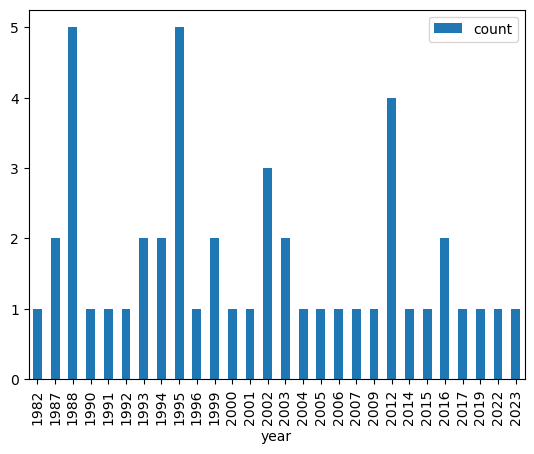

In [79]:
b = pd.DataFrame(a)
b.index.name ='year'
b.rename(columns ={'year':'count'}, inplace = True)
b.sort_values(by = 'year').plot(kind = 'bar')

## Roles

In [80]:
roles = hugh_grant_data.actor_role.value_counts()
roles

actor                41
actor soundtrack      4
thanks                2
Name: actor_role, dtype: int64

<AxesSubplot:>

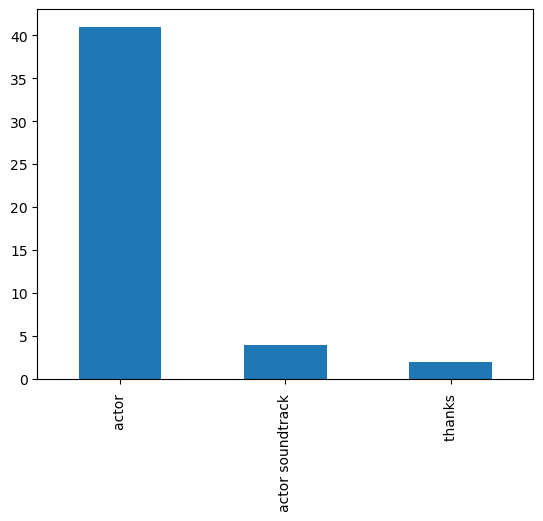

In [81]:
roles.plot(kind='bar')

## Rating and runtimes

In [82]:
hugh_grant_data[['title','rating','runtimes']].describe()

,rating,runtimes
count,46.000000,47.000000
mean,6.517391,102.765957
std,1.000734,34.362652
min,2.200000,3.000000
25%,6.000000,97.000000
50%,6.600000,107.000000
75%,7.200000,117.000000
max,8.100000,172.000000


In [83]:
hugh_grant_data[['title','rating','runtimes']].sort_values(by = 'runtimes', ascending=True).head(10)

,title,rating,runtimes
19,Sense and Sensibility: Deleted Scenes,8.1,3
17,Two Weeks Notice: Additional Scenes,7.3,7
39,Nocturnes,7.1,9
10,So You Want to Be a Pirate!,6.5,18
8,The Life and Times of Gangsta Brown Part 2,NaN,61
11,The Pirates! Band of Misfits,6.7,88
42,The Lair of the White Worm,6.0,93
23,Small Time Crooks,6.6,94
41,Rowing with the Wind,5.7,95
15,Housewarming,5.3,95


In [84]:
hugh_grant_data[['title','rating','runtimes']].sort_values(by = 'rating', ascending=False).head(10)

,title,rating,runtimes
19,Sense and Sensibility: Deleted Scenes,8.1,3
34,The Remains of the Day,7.8,134
2,The Gentlemen,7.8,113
3,Paddington 2,7.8,103
28,Sense and Sensibility,7.7,136
45,Maurice,7.7,140
18,Love Actually,7.6,135
9,Cloud Atlas,7.4,172
17,Two Weeks Notice: Additional Scenes,7.3,7
36,Bitter Moon,7.2,139


In [797]:
hugh_grant_data[['title','budget_MM','gross (worldwide)','revenue']].describe()

,budget_MM,gross (worldwide),revenue
count,32.000000,37.000000,31.000000
mean,32.895312,92.489730,71.305161
std,24.320582,101.737461,101.003386
min,0.050000,0.060000,-31.000000
25%,15.750000,4.500000,-2.650000
50%,32.500000,49.000000,27.000000
75%,41.250000,139.000000,129.000000
max,102.000000,364.000000,322.000000


In [868]:
hugh_grant_data[['title','budget_MM','gross (worldwide)','r ']].sort_values(by = 'gross (worldwide)', ascending=False).head(10)

,title,budget_MM,gross (worldwide),revenue
25,Notting Hill,42.0,364.0,322.0
22,Bridget Jones's Diary,25.0,282.0,257.0
16,Bridget Jones: The Edge of Reason,40.0,265.0,225.0
18,Love Actually,40.0,248.0,208.0
33,Four Weddings and a Funeral,4.4,246.0,241.6
3,Paddington 2,40.0,228.0,188.0
4,Bridget Jones's Baby,35.0,212.0,177.0
20,Two Weeks Notice,60.0,199.0,139.0
13,Music and Lyrics,40.0,146.0,106.0
29,Nine Months,NaN,139.0,NaN


In [875]:
hugh_grant_data[['title','budget_MM','gross (worldwide)','revenue']].sort_values(by = 'revenue', ascending=False)

,title,budget_MM,gross (worldwide),revenue
25,Notting Hill,42.00,364.00,322.00
22,Bridget Jones's Diary,25.00,282.00,257.00
33,Four Weddings and a Funeral,4.40,246.00,241.60
16,Bridget Jones: The Edge of Reason,40.00,265.00,225.00
18,Love Actually,40.00,248.00,208.00
3,Paddington 2,40.00,228.00,188.00
4,Bridget Jones's Baby,35.00,212.00,177.00
20,Two Weeks Notice,60.00,199.00,139.00
28,Sense and Sensibility,16.00,135.00,119.00
13,Music and Lyrics,40.00,146.00,106.00


## Awards

In [217]:
hugh_grant_awards.head(3)

,award_year,outcome,award_name,award_film,notes
0,2021,Nominee,Primetime Emmy,The Undoing,Outstanding Lead Actor in a Limited or Antholo...
1,2019,Nominee,Primetime Emmy,A Very English Scandal,Outstanding Lead Actor in a Limited Series or ...
2,2019,Nominee,BAFTA TV Award,A Very English Scandal,Best Leading Actor\nA Very English Scandal (2018)


In [218]:
hugh_grant_awards.tail(3)

,award_year,outcome,award_name,award_film,notes
94,2018,Winner,UFCA Award,Paddington 2,Best Supporting Actor\nPaddington 2 (2017)\n\n...
95,1987,Winner,Best Actor,Maurice,Maurice (1987)\n\nShared with:\n\nJames Wilby
96,1996,Winner,Yoga Award,Nine Months,Worst Foreign Actor\nNine Months (1995)


In [220]:
hugh_grant_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   award_year  97 non-null     int64 
 1   outcome     97 non-null     object
 2   award_name  97 non-null     object
 3   award_film  91 non-null     object
 4   notes       95 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.9+ KB


In [802]:
hugh_grant_awards.isna().sum()

award_year    0
outcome       0
award_name    0
award_film    6
notes         2
dtype: int64

### The most awarded year

In [221]:
hugh_grant_awards.award_year.value_counts()

2019    18
2018    14
2021    10
1995     9
2003     9
2017     8
2016     7
2000     5
2002     4
1996     2
2001     2
2004     2
2020     2
2007     1
2006     1
2010     1
2013     1
1987     1
Name: award_year, dtype: int64

### The most awarded film

In [839]:
hugh_grant_awards.award_film.value_counts()

Paddington 2                                     18
A Very English Scandal                           13
Florence Foster Jenkins                          13
The Undoing                                      11
Four Weddings and a Funeral                       8
About a Boy                                       8
Notting Hill                                      5
Bridget Jones's Diary                             5
Sense and Sensibility                             2
Love Actually                                     2
The Pirates! In an Adventure with Scientists!     1
One Red Nose Day and a Wedding                    1
Did You Hear About the Morgans?                   1
Music and Lyrics                                  1
Maurice                                           1
Nine Months                                       1
Name: award_film, dtype: int64

### The film with the most awards ('Winner')

In [837]:
hugh_grant_awards[hugh_grant_awards.outcome == 'Winner'].award_film.value_counts()

Four Weddings and a Funeral       5
Paddington 2                      4
About a Boy                       3
Florence Foster Jenkins           3
Notting Hill                      2
A Very English Scandal            1
One Red Nose Day and a Wedding    1
Bridget Jones's Diary             1
Maurice                           1
Nine Months                       1
Name: award_film, dtype: int64

In [838]:
hugh_grant_awards[hugh_grant_awards.outcome == 'Nominee'].award_film.value_counts()

Paddington 2                                     14
A Very English Scandal                           12
The Undoing                                      11
Florence Foster Jenkins                          10
About a Boy                                       5
Bridget Jones's Diary                             4
Four Weddings and a Funeral                       3
Notting Hill                                      3
Sense and Sensibility                             2
Love Actually                                     2
The Pirates! In an Adventure with Scientists!     1
Did You Hear About the Morgans?                   1
Music and Lyrics                                  1
Name: award_film, dtype: int64

In [87]:
hugh_grant_awards.outcome.value_counts()

Nominee    72
Winner     25
Name: outcome, dtype: int64

<AxesSubplot:ylabel='outcome'>

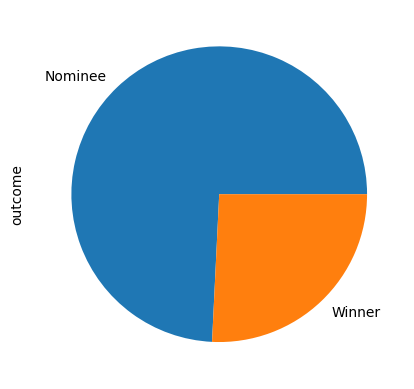

In [86]:
hugh_grant_awards.outcome.value_counts().plot(kind = 'pie')

In [824]:
hugh_grant_awards[hugh_grant_awards.award_name == 'Actor']

,award_year,outcome,award_name,award_film,notes
84,2021,Nominee,Actor,The Undoing,Outstanding Performance by a Male Actor in a T...
85,2019,Nominee,Actor,A Very English Scandal,Outstanding Performance by a Male Actor in a T...
86,2017,Nominee,Actor,Florence Foster Jenkins,Outstanding Performance by a Male Actor in a S...
87,1996,Nominee,Actor,Sense and Sensibility,Outstanding Performance by a Cast\nSense and S...


In [829]:
hugh_grant_awards.award_name[hugh_grant_awards.award_name == 'Actor'] = 'Screen Actors Guild Awards'

### The most popular award

In [835]:
hugh_grant_awards.award_name.value_counts().head(10)

Golden Globe                  6
Screen Actors Guild Awards    4
BAFTA Film Award              3
ALFS Award                    3
Teen Choice Award             3
Satellite Award               3
National Film Award           3
Empire Award                  3
Critics Choice Award          3
Primetime Emmy                2
Name: award_name, dtype: int64

In [836]:
hugh_grant_awards[hugh_grant_awards.outcome == 'Winner'].award_name.value_counts().head(10)

Empire Award                      2
Peter Sellers Award for Comedy    2
ALFS Award                        2
BAFTA Film Award                  1
Hollywood Film Award              1
Best Actor                        1
UFCA Award                        1
Taormina Arte Award               1
SDFCS Award                       1
NMFC Award                        1
Name: award_name, dtype: int64

In [866]:
hugh_grant_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   award_year  97 non-null     int64 
 1   outcome     97 non-null     object
 2   award_name  97 non-null     object
 3   award_film  91 non-null     object
 4   notes       95 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.9+ KB
